<a href="https://colab.research.google.com/github/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG2/Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Washington Gustavo Cevallos Vaca <br>
Link:   https://colab.research.google.com/github/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG2/Algoritmos_AG3.ipynb <br>
Github: https://github.com/wgcv/03MAIR-Algoritmos-de-Optimizacion
<br>




In [3]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

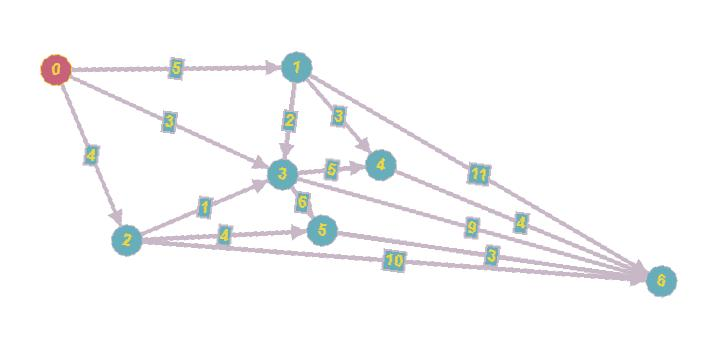

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [4]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [5]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [6]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [7]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por :")
print(calcular_ruta(RUTA, 0,6) )
print("Con valor" , PRECIOS[0][6])



La ruta pasa por :
0,2,5
Con valor 11


##Problema de Asignacion de tarea

In [8]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [19]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

## Medir el tiempo con decorador

In [20]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f"\nLa función {func.__name__} tardó {end - start:.6f} segundos\n")
        print("-"*10 + "\n")
        return result
    return wrapper

## Copié la funcion de fuerza bruta para ver como trabaja del ejemplo

In [21]:
import math
import itertools
@timeit
def fuerza_bruta(COSTES):
  #Representacion de la solucion será una tupla donde cada valor en la cordenada i-sima es la tarea asignado al agente i
  # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
  #
  #¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponecial)
  #Con dimension 11 se va a 1 minuto de ejecucion
  mejor_valor = math.inf
  mejor_solucion = ()
  for s in itertools.permutations(range(len(COSTES))):
    #print(s, valor (s, COSTES))
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print(mejor_solucion)
fuerza_bruta(COSTES)

(0, 3, 1, 2)

La función fuerza_bruta tardó 0.000096 segundos

----------



In [37]:
                #Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [23]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [24]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [25]:
@timeit
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
  del NODOS
  del HIJOS
  del NODO_FINAL

ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4

La función ramificacion_y_poda tardó 0.000294 segundos

----------



## Análisis de mejora de notas

### Funcion n dimensión de costes

In [26]:
import random

def matriz_random(filas, columnas, minimo=0, maximo=9):
    return [
        [random.randint(minimo, maximo) for _ in range(columnas)]
        for _ in range(filas)
    ]
def imprimir_matriz(matriz):
    for fila in matriz:
        print(" ".join(str(elemento) for elemento in fila))


### Probar con Dimesión 4

In [27]:
COSTES4=matriz_random(4,4,1,100)
fuerza_bruta(COSTES4)
ramificacion_y_poda(COSTES4)

(0, 3, 2, 1)

La función fuerza_bruta tardó 0.000814 segundos

----------

La solucion final es: [{'s': (0, 2, 1, 3), 'ci': 164}]  en  10  iteraciones  para dimension:  4

La función ramificacion_y_poda tardó 0.000181 segundos

----------



### Probar con Dimesión 5 al 11.

In [28]:
import gc
gc.collect()

168

In [29]:
for i in range(5, 12):
  costes=matriz_random(i,i,1,100)
  print(f"Matriz {i}x{i}")
  imprimir_matriz(costes)
  # Si dos veces por si hay referencias nested, en ciclo la primera borra la primera referencia A-B y luego borra B-A
  gc.collect()
  gc.collect()

  fuerza_bruta(costes)
  gc.collect()
  gc.collect()

  ramificacion_y_poda(costes)

Matriz 5x5
9 39 80 63 70
20 50 21 74 93
67 5 69 99 31
54 93 37 98 41
58 21 29 48 42
(0, 2, 1, 4, 3)

La función fuerza_bruta tardó 0.000201 segundos

----------

La solucion final es: [{'s': (0, 2, 1, 4, 3), 'ci': 124}]  en  15  iteraciones  para dimension:  5

La función ramificacion_y_poda tardó 0.000266 segundos

----------

Matriz 6x6
12 98 49 71 26 53
62 42 63 37 95 59
81 44 32 40 18 5
30 81 22 74 13 33
55 37 65 44 79 97
95 9 35 25 53 47
(0, 4, 5, 1, 3, 2)

La función fuerza_bruta tardó 0.000420 segundos

----------

La solucion final es: [{'s': (0, 3, 5, 4, 1, 2), 'ci': 139}]  en  137  iteraciones  para dimension:  6

La función ramificacion_y_poda tardó 0.002300 segundos

----------

Matriz 7x7
18 97 51 18 93 54 14
31 45 60 94 20 65 87
64 73 51 72 44 30 35
39 65 31 98 65 59 51
88 30 45 45 47 96 88
20 74 49 43 77 50 45
55 70 33 44 18 64 23
(5, 4, 3, 0, 1, 2, 6)

La función fuerza_bruta tardó 0.003016 segundos

----------

La solucion final es: [{'s': (6, 4, 5, 2, 1, 0, 3), 'ci': 

In [38]:
import heapq

def ramificacion_y_poda_optimized(COSTES_IN):
    # 1. DATA PREPARATION: Ensure COSTES is a list of lists
    # This prevents the KeyError in your CI function
    if isinstance(COSTES_IN, dict):
        COSTES = [list(COSTES_IN[k].values()) if isinstance(COSTES_IN[k], dict) else list(COSTES_IN[k])
                  for k in sorted(COSTES_IN.keys())]
    else:
        COSTES = COSTES_IN

    DIMENSION = len(COSTES)
    CotaSup = float('inf')
    MEJOR_SOLUCION = ()

    # Priority Queue (Min-Heap)
    # Format: (LowerBound, PartialSolution)
    NODOS = []

    # Initial node
    initial_ci = CI((), COSTES)
    heapq.heappush(NODOS, (initial_ci, ()))

    iteracion = 0

    while NODOS:
        iteracion += 1

        # Get the most promising node (Lowest CI) - O(log N)
        current_ci, s_actual = heapq.heappop(NODOS)

        # Pruning: Skip if this branch can't beat our current best
        if current_ci >= CotaSup:
            continue

        # Generate children (crear_hijos must return tuples/lists of indices)
        for hijo_s in crear_hijos(s_actual, DIMENSION):
            ci_hijo = CI(hijo_s, COSTES)

            if len(hijo_s) == DIMENSION:
                # Found a leaf node (complete solution)
                if ci_hijo < CotaSup:
                    CotaSup = ci_hijo
                    MEJOR_SOLUCION = hijo_s
            else:
                # Add to queue only if promising
                if ci_hijo < CotaSup:
                    heapq.heappush(NODOS, (ci_hijo, hijo_s))

    print(f"Final: {MEJOR_SOLUCION} | Coste: {CotaSup} | Iteraciones: {iteracion}")
    return MEJOR_SOLUCION

In [39]:
COSTES13=matriz_random(13,13,1,100)
ramificacion_y_poda_optimized(COSTES13)

KeyError: 0

## ¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?

# Nota
Python tiene un garbage collector a diferencia de  un reference counting puede demnorar un tiempo hasta liberar la memoria, lo cual puede hacer más ineficiente, por lo que ciertas variables las encero con None y luego obligo a correr el collector de basura antes de volver a llamar la función

##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide por le metodo del descenso del gradiente : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion(f) y el gradiente(df)
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
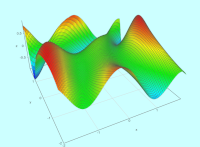


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


##Problema de Autobuses por Fuerza Bruta

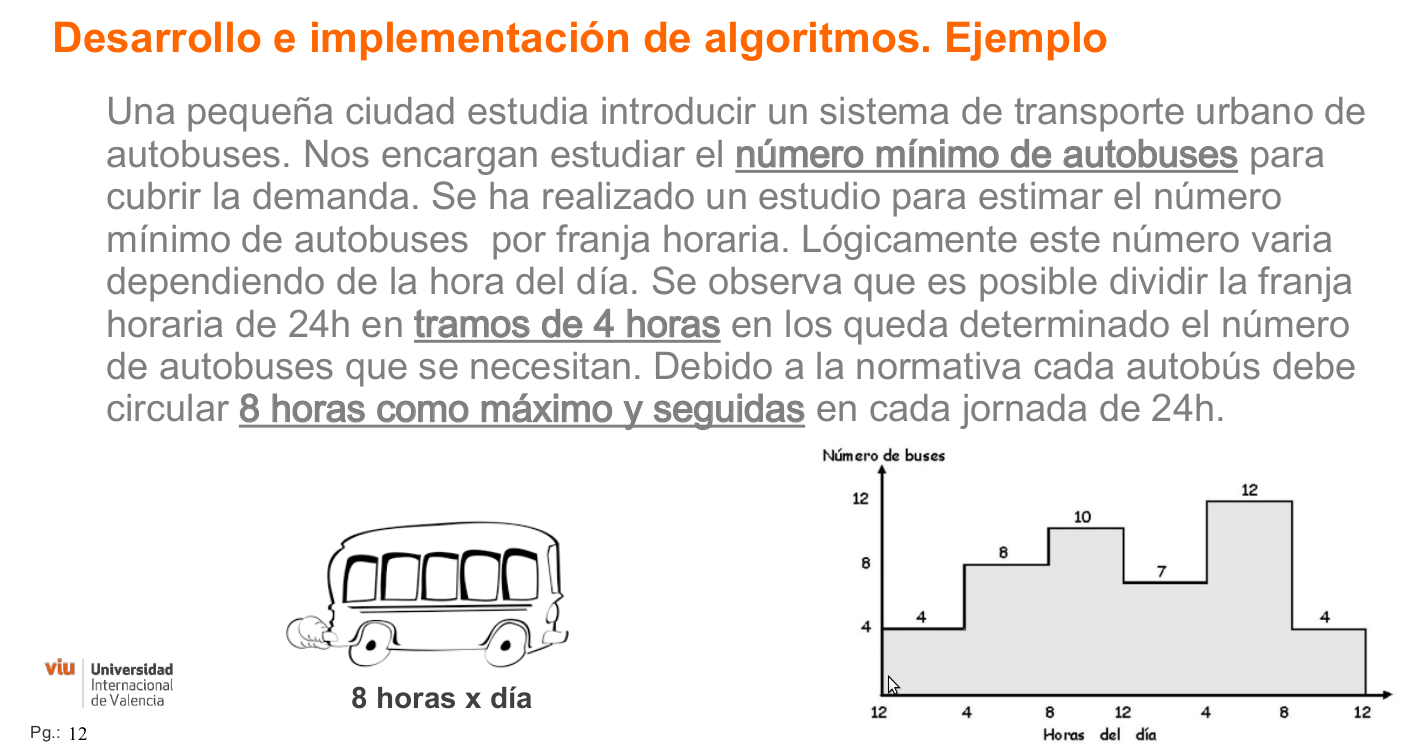

In [ ]:
###################################################
# Ximo Sanz Tornero.
###################################################
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Posible Solucion
x = [4,5,6,7,8,9]

for t in range(tramos):
    # Calculamos el número actual de autobuses que están cubriendo el tramo t
    cobertura_actual = x[t] + x[t - 1]  # Autobuses en t y t-1 (cíclico)

    # Si la cobertura actual es menor que la demanda, añadimos autobuses en t
    if cobertura_actual < demanda[t]:
        # Añadimos los autobuses necesarios en el tramo t
        x[t] += demanda[t] - cobertura_actual

#Función objetivo
f_objetivo = sum(x)


# Se crean funciones tanto para verificar posibles soluciones como para obtener el valor de la función objetivo de la solución
# Función objetivo: suma de todos los x[i]
def funcion_objetivo(solucion):
    return sum(solucion)

# Verificación de restricciones
def verifica_restricciones(solucion):
    for t in range(tramos):
        # Se calcula el número actual de autobuses que están cubriendo el tramo t
        cobertura_actual = solucion[t] + solucion[t - 1]  # Cíclico
        if cobertura_actual < demanda[t]:
            return False
    return True


# Se realiza el algoritmo por fuerza bruta con todas las posibles combinaciones de valores que tenemos en funcion de la variable demanda
# Generación del espacio de soluciones
# Para ver mejor el funcionamiento, ejecutar: for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)
espacio_soluciones = product(*(range(d + 1) for d in demanda))

# Búsqueda de la mejor solución
mejor_valor_objetivo = float('inf')
mejores_soluciones = []

for solucion in espacio_soluciones:
    if verifica_restricciones(solucion):
        valor_objetivo = funcion_objetivo(solucion)
        if valor_objetivo < mejor_valor_objetivo:
            mejor_valor_objetivo = valor_objetivo
            mejores_soluciones = [solucion]
        elif valor_objetivo == mejor_valor_objetivo:
            mejores_soluciones.append(solucion)  # Agrega soluciones con el mismo valor

# Resultado
print("Mejores soluciones:")
for solucion in mejores_soluciones:
    print(solucion)
print("Valor mínimo de la función objetivo:", mejor_valor_objetivo)



In [ ]:
for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)